In [24]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading the dataset

data = pd.read_csv(r"C:\Users\Shashi\Model Building\Naive Bayes\NB_Car_Ad.csv")

In [17]:
# Importing the Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Checking the head of data

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
# Removing the Unrelevent Columns

data = data.drop(('User ID'), axis =1)

In [8]:
data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [9]:
# Checking the Missing Values

data.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
# Checking the duplicates

duplicates = data.duplicated()
sum(duplicates)

20

In [12]:
# Removing the duplicates

data = data.drop_duplicates()

In [14]:
data.duplicated().sum()

0

In [15]:
# Label Encoding 

from sklearn.preprocessing import LabelEncoder 

In [18]:
enc = LabelEncoder()

data['Gender'] = enc.fit_transform(data['Gender'])

In [19]:
# Checking the data

data

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [20]:
# Standardization using Scaler Min = 0, Max = 1

def norm_fun(i):
  x = (i - i.min())/(i.max() - i.min())

  return x

In [21]:
data_norm = norm_fun(data)
data = pd.DataFrame(data_norm)
data.describe()

,Gender,Age,EstimatedSalary,Purchased
count,380.000000,380.000000,380.000000,380.000000
mean,0.478947,0.466353,0.410526,0.368421
std,0.500215,0.252202,0.256327,0.483012
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.261905,0.207407,0.000000
50%,0.000000,0.452381,0.411111,0.000000
75%,1.000000,0.666667,0.540741,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [22]:
# Checking the correalation

data.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.093522,-0.039119,-0.044257
Age,-0.093522,1.000000,0.170588,0.626505
EstimatedSalary,-0.039119,0.170588,1.000000,0.374928
Purchased,-0.044257,0.626505,0.374928,1.000000


<AxesSubplot:>

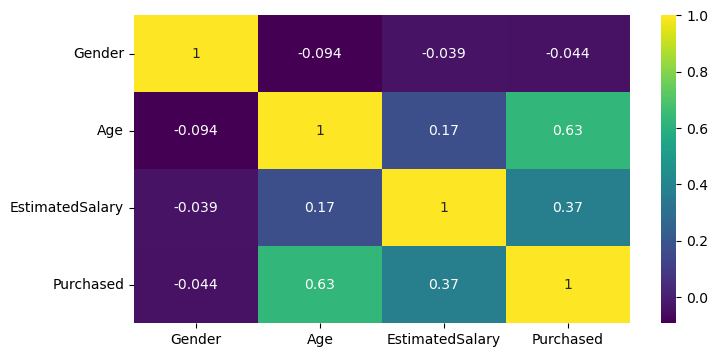

In [28]:
# Heat map

fig = plt.figure(figsize = (8,4))
sns.heatmap(data.corr(), cmap='viridis', annot = True) 

In [30]:
# Spliting the data

X = data.iloc[:,0:3]
Y = data.iloc[:,3]

In [31]:
X

,Gender,Age,EstimatedSalary
0,1.0,0.023810,0.029630
1,1.0,0.404762,0.037037
2,0.0,0.190476,0.207407
3,0.0,0.214286,0.311111
4,1.0,0.023810,0.451852
...,...,...,...
395,0.0,0.666667,0.192593
396,1.0,0.785714,0.059259
397,0.0,0.761905,0.037037
398,1.0,0.428571,0.133333


In [32]:
Y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Purchased, Length: 380, dtype: float64

In [33]:
# Importing the train test split

from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [34]:
# Building the Model

from sklearn.naive_bayes import GaussianNB

In [35]:
# Creating the Model

model = GaussianNB()
model.fit(x_train, y_train)

# Checking the model score 

model.score(X, Y)

0.8921052631578947

In [36]:
# Evaluation on Train Data

y_pred = model.predict(x_test)
pd.crosstab(y_test, y_pred)

col_0,0.0,1.0
Purchased,,
0.0,69,5
1.0,9,31


In [37]:
# Accuracy

accuracy_test = np.mean(y_test == y_pred)
accuracy_test

0.8771929824561403

In [38]:
# or alternatively

import sklearn.metrics as skmet

skmet.accuracy_score(y_test, y_pred) 

0.8771929824561403

In [39]:
# Training Data accuracy

y_pred = model.predict(x_train)

pd.crosstab(y_train, y_pred)


col_0,0.0,1.0
Purchased,,
0.0,151,15
1.0,12,88


In [40]:
# Accuracy
accuracy_train_m = np.mean(y_train == y_pred)
accuracy_train_m

0.8984962406015038

In [41]:
skmet.accuracy_score(y_train, y_pred) 

0.8984962406015038

In [42]:
# Checking the model score for test and train

model.score(x_train, y_train)

0.8984962406015038

In [43]:
model.score(x_test, y_test)

0.8771929824561403

## Result : The Scores of Train and Test are little similar with more than 85% so Concluding by saying the right fit.